In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Read in data, rename columns, simple pre-processing

In [2]:
filename = '21042601_UNCWParkingLot.CSV'
filepath = os.path.join('Data', filename)
df = pd.read_csv(filepath, parse_dates = [[0, 1]], header = None)
df.columns = ['time', 'elapsed time (sec)', 'lat', 'N or S', 'lon', 'E or W', 'CO2 (ppm)']

# GPS spits out lat*100, lon*100, so divide by 100 for correct value
df['lat'] /= 100
df['lon'] /= 100

# South should be negative
south = df['N or S'] == 'S'
df['lat'][south] *= -1 

# West should be negative
west = df['E or W'] == 'W'
df['lon'][west] *= -1 

# Take a look
df.head()

<ipython-input-2-2c9e17fbf3c7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'][south] *= -1
<ipython-input-2-2c9e17fbf3c7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lon'][west] *= -1


,time,elapsed time (sec),lat,N or S,lon,E or W,CO2 (ppm)
0,2021-04-26 16:28:38,5,34.135286,N,-77.522378,W,531
1,2021-04-26 16:28:40,7,34.135300,N,-77.522368,W,576
2,2021-04-26 16:28:42,9,34.135269,N,-77.522363,W,519
3,2021-04-26 16:28:45,11,34.135288,N,-77.522329,W,514
4,2021-04-26 16:28:47,13,34.135288,N,-77.522324,W,521


### Plot time-series

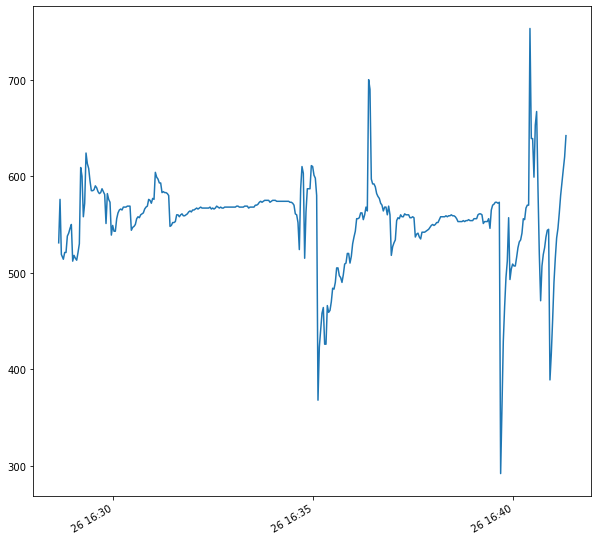

In [3]:
fig, axs = plt.subplots(figsize = (10, 10))
axs.plot(df['time'], df['CO2 (ppm)'])
fig.autofmt_xdate()

### Plot spatial data

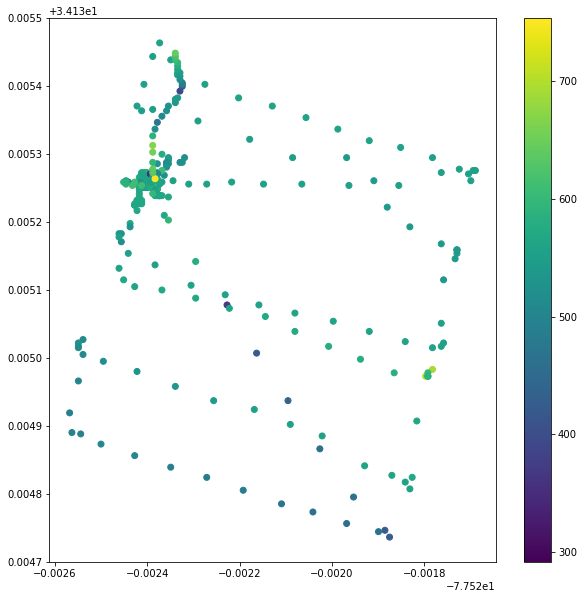

In [4]:
fig, axs = plt.subplots(figsize = (10, 10))
m = axs.scatter(df['lon'], df['lat'], c = df['CO2 (ppm)'])
fig.colorbar(m)